In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
# import logistic regression classifier
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
# import numpy
import numpy as np

%matplotlib inline

In [2]:
df_data = pd.read_csv('http://archive.ics.uci.edu/ml/machine-learning-databases/parkinsons/parkinsons.data')
df_data = df_data.drop('name', axis=1)
X = df_data.drop('status', axis=1)
y = df_data['status']

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y)

lr = LogisticRegression(solver='lbfgs', penalty='none')
lr.fit(X_train, y_train)


/opt/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:947: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [4]:
lr = LogisticRegression(solver='lbfgs', penalty='none', max_iter=1000)
lr.fit(X_train, y_train)

lr.score(X_test, y_test)

0.8571428571428571

In [5]:
lr_score = lr.score(X_test, y_test)

print('Accuracy of Logistic Regression without regularization: {:.3f}'.format(lr_score))

Accuracy of Logistic Regression without regularization: 0.857


In [6]:
lr_regularized = LogisticRegression(solver='lbfgs', penalty='l2', max_iter=1000)
lr_regularized.fit(X_train, y_train)

test_score = lr_regularized.score(X_test, y_test)
train_score = lr_regularized.score(X_train, y_train)

print('Score on training data: ', train_score)
print('Score on test data: ', test_score)

Score on training data:  0.8698630136986302
Score on test data:  0.8775510204081632


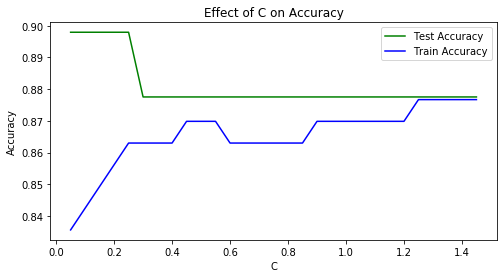

In [7]:
c_vals = np.arange(0.05, 1.5, 0.05)
test_accuracy = []
train_accuracy = []

for c in c_vals:
  lr = LogisticRegression(solver='lbfgs', penalty='l2', C=c, max_iter=1000)
  lr.fit(X_train, y_train)
  test_accuracy.append(lr.score(X_test, y_test))
  train_accuracy.append(lr.score(X_train, y_train))

fig = plt.figure(figsize=(8, 4))
ax1 = fig.add_subplot(1, 1, 1)
ax1.plot(c_vals, test_accuracy, '-g', label='Test Accuracy')
ax1.plot(c_vals, train_accuracy, '-b', label='Train Accuracy')
ax1.set(xlabel='C', ylabel='Accuracy')
ax1.set_title('Effect of C on Accuracy')
ax1.legend()
plt.show()

A c value of 1.2 to 1.4 shows the least distance between test and train accuracy. 